In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from init_objects import *
from functions.stylizedfacts import *
from functions.helpers import organise_data
from functions.inequality import gini, lorenz_curve
from qe_inequality_model import *
import statsmodels.api as sm
from matplotlib import style
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col
from functions.find_bubbles import *

In [6]:
style.use('ggplot')

# Study model dynamics

## run model

In [37]:
NRUNS = 1
burn_in_period = 0

In [45]:
params = {"fundamental_values": [166, 105],
              "trader_sample_size": 10, "n_traders": 500,
              "ticks": 800, "std_fundamentals": [0.05, 0.01],
              "std_noise": 0.10696588473846724, "w_random": 0.1,
              "strat_share_chartists": 0.7,
              "init_assets": [50, 50], "base_risk_aversion": 1.0,
              'spread_max': 0.004087, "horizon": 200,
              "fundamentalist_horizon_multiplier": 0.2,
              "trades_per_tick": 3, "mutation_intensity": 0.00,
              "average_learning_ability": 0.0,
              "qe_perc_size": 0.8, "qe_start": 100, "qe_end": 110, "qe_asset_index": 0}

In [39]:
trdrs = []
orbs = []
central_banks = []
for seed in range(NRUNS): 
    traders, central_bank, orderbook = init_objects_qe_ineq(params, seed)
    traders, central_bank, orderbook = qe_ineq_model(traders, central_bank, orderbook, params, seed)
    central_banks.append(central_bank)
    trdrs.append(traders)
    orbs.append(orderbook)

Start of simulation  0
QE TIME =  100
QE TIME =  100
hold your horses QE is working
hold your horses QE is working
QE TIME =  100
hold your horses QE is working
QE TIME =  101
hold your horses QE is working
hold your horses QE is working
hold your horses QE is working
hold your horses QE is working
QE TIME =  101
hold your horses QE is working
hold your horses QE is working
QE TIME =  101
hold your horses QE is working
QE TIME =  102
QE TIME =  102
QE TIME =  102
QE TIME =  103
QE TIME =  103
QE TIME =  103
QE TIME =  104
QE TIME =  104
QE TIME =  104
QE TIME =  105
QE TIME =  105
QE TIME =  105
QE TIME =  106
QE TIME =  106
QE TIME =  106
QE TIME =  107
QE TIME =  107
hold your horses QE is working
QE TIME =  107
QE TIME =  108
QE TIME =  108
QE TIME =  108
QE TIME =  109
QE TIME =  109
QE TIME =  109
hold your horses QE is working
hold your horses QE is working
hold your horses QE is working
hold your horses QE is working
hold your horses QE is working
hold your horses QE is working


# Plot prices 

1. Bonds
2. Stocks

In [40]:
np.mean(orbs[0][1].tick_close_price)

125.01602956325593

In [41]:
np.mean(orbs[0][1].tick_close_price)

125.01602956325593

Text(0, 0.5, 'Asset 1')

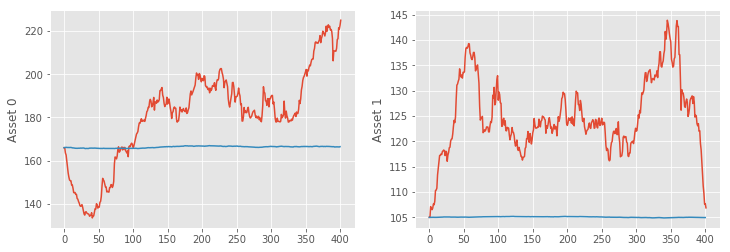

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(range(len(orbs[0][0].tick_close_price)), orbs[0][0].tick_close_price, label='price')
ax1.plot(range(len(orbs[0][0].fundamental)), orbs[0][0].fundamental, label='fundamental')

ax1.set_ylabel('Asset 0', fontsize='12')

ax2.plot(range(len(orbs[0][1].tick_close_price)), orbs[0][1].tick_close_price, label='price')
ax2.plot(range(len(orbs[0][1].fundamental)), orbs[0][1].fundamental, label='fundamental')
ax2.set_ylabel('Asset 1', fontsize='12')

## Plot balance sheet of CB 

Text(0, 0.5, 'Asset 0')

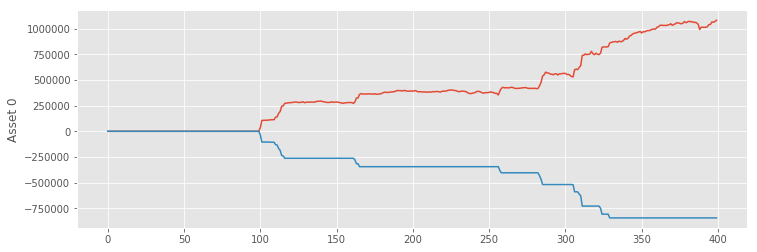

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,4))

cb_asset_value = np.array(orbs[0][params["qe_asset_index"]].tick_close_price[2:]) * np.array(central_bank.var.assets[params["qe_asset_index"]])

ax1.plot(range(len(cb_asset_value)), cb_asset_value, label='assets')
ax1.plot(range(len(cb_asset_value)), central_bank.var.currency, label='currency')

ax1.set_ylabel('Asset 0', fontsize='12')